<a href="https://colab.research.google.com/github/PatricRc/Tech_Stocks_Analysis/blob/main/Stock_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Obtener data Stocks S&P 500

In [ ]:
end = dt.datetime.now()
start = dt.date(end.year - 4, end.month,end.day)

tickers = ['AAPL', 'TSLA', 'AMZN', 'FB']

In [ ]:
df = yf.download(tickers,start,end)['Adj Close']

In [ ]:
df.head()

,AAPL,AMZN,FB,TSLA
Date,,,,
2017-11-16,40.910797,1137.290039,179.589996,62.500000
2017-11-17,40.683655,1129.880005,179.000000,63.009998
2017-11-20,40.643005,1126.310059,178.740005,61.748001
2017-11-21,41.398575,1139.489990,181.860001,63.562000
2017-11-22,41.833744,1156.160034,180.869995,62.520000


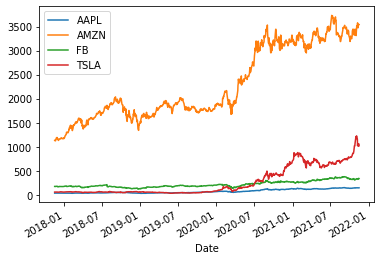

In [ ]:
df.plot()
plt.show()

In [ ]:
## Retorno diario
retorno_diario = df.pct_change().dropna(axis=0)
retorno_diario

,AAPL,AMZN,FB,TSLA
Date,,,,
2017-11-17,-0.005552,-0.006516,-0.003285,0.008160
2017-11-20,-0.000999,-0.003160,-0.001452,-0.020029
2017-11-21,0.018590,0.011702,0.017455,0.029377
2017-11-22,0.010512,0.014629,-0.005444,-0.016393
2017-11-24,0.000057,0.025810,0.010560,0.009437
...,...,...,...,...
2021-11-10,-0.019163,-0.026335,-0.023049,0.043429
2021-11-11,-0.000338,-0.002743,0.000305,-0.004157
2021-11-12,0.014337,0.015162,0.040123,-0.028293


In [ ]:
## Retornos acumulados
retorno_diario_acumulado = (retorno_diario + 1).cumprod() -1
retorno_diario_acumulado

,AAPL,AMZN,FB,TSLA
Date,,,,
2017-11-17,-0.005552,-0.006516,-0.003285,0.008160
2017-11-20,-0.006546,-0.009655,-0.004733,-0.012032
2017-11-21,0.011923,0.001934,0.012640,0.016992
2017-11-22,0.022560,0.016592,0.007127,0.000320
2017-11-24,0.022618,0.042830,0.017763,0.009760
...,...,...,...,...
2021-11-10,2.615671,2.061708,0.824378,16.087199
2021-11-11,2.614449,2.053311,0.824935,16.016160
2021-11-12,2.666269,2.099605,0.898157,15.534721


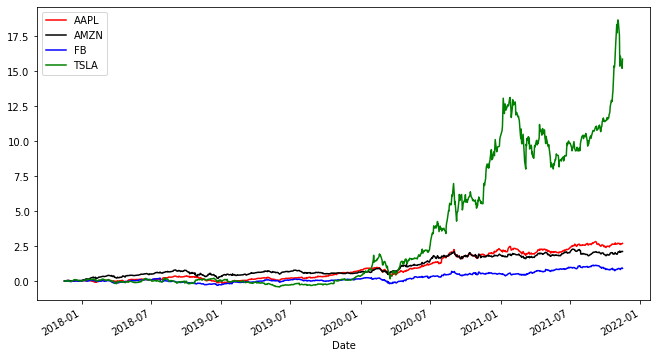

In [ ]:
# Parametros para gráficos
colores = ['r', 'k', 'b', 'g']
retorno_diario_acumulado.plot(color=colores, figsize=(11,6))
plt.show()

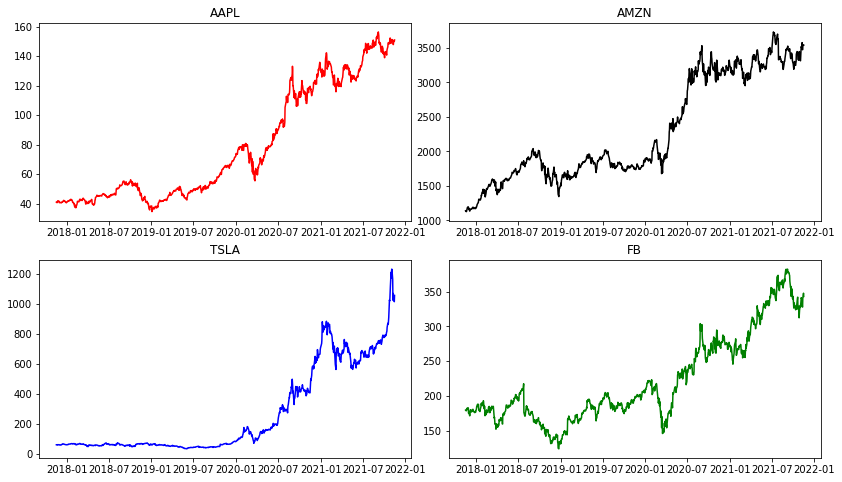

In [ ]:
## Grafico del precio de acciones durante los ultimos 4 años
fig, axs= plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace':0.2, 'wspace':0.1})

axs[0, 0].plot(df['AAPL'], c='r')
axs[0, 0].set_title('AAPL')
axs[0, 1].plot(df['AMZN'], c='k')
axs[0, 1].set_title('AMZN')
axs[1, 0].plot(df['TSLA'], c='b')
axs[1, 0].set_title('TSLA')
axs[1, 1].plot(df['FB'], c='g')
axs[1, 1].set_title('FB')
plt.show()

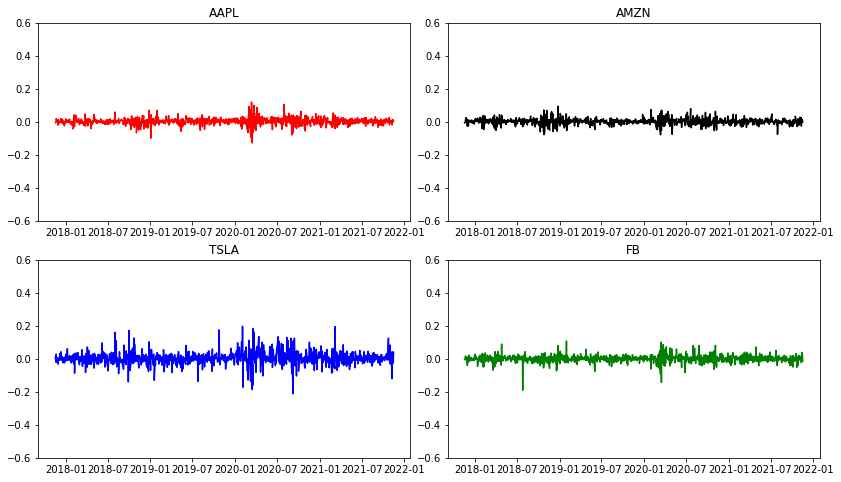

In [ ]:
## Comparación de volatilidades diarias
fig, axs= plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace':0.2, 'wspace':0.1})

axs[0, 0].plot(retorno_diario['AAPL'], c='r')
axs[0, 0].set_title('AAPL')
axs[0, 0].set_ylim([-0.6,0.6])
axs[0, 1].plot(retorno_diario['AMZN'], c='k')
axs[0, 1].set_title('AMZN')
axs[0, 1].set_ylim([-0.6,0.6])
axs[1, 0].plot(retorno_diario['TSLA'], c='b')
axs[1, 0].set_title('TSLA')
axs[1, 0].set_ylim([-0.6,0.6])
axs[1, 1].plot(retorno_diario['FB'], c='g')
axs[1, 1].set_title('FB')
axs[1, 1].set_ylim([-0.6,0.6])
plt.show()

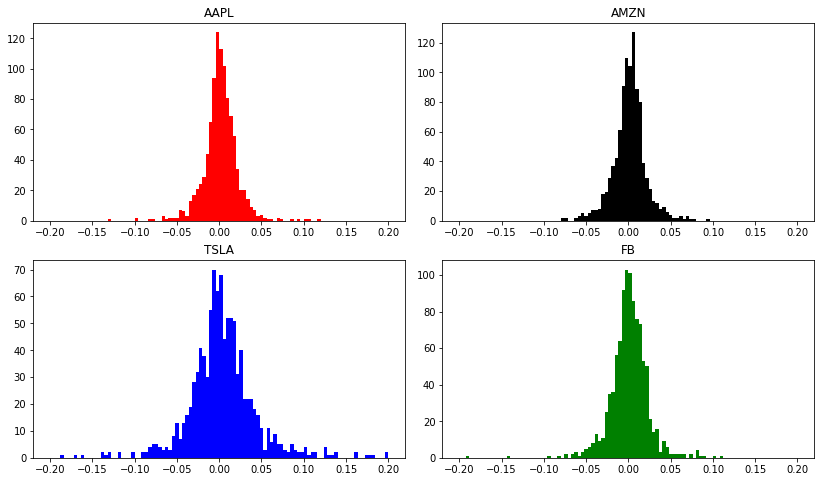

In [ ]:
## Distribucion de los retornos
fig, axs= plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace':0.2, 'wspace':0.1})

axs[0, 0].hist(retorno_diario['AAPL'], bins=100,color='r', range=(-0.2, 0.2))
axs[0, 0].set_title('AAPL')
axs[0, 1].hist(retorno_diario['AMZN'], bins=100,color='k', range=(-0.2, 0.2))
axs[0, 1].set_title('AMZN')
axs[1, 0].hist(retorno_diario['TSLA'], bins=100,color='b', range=(-0.2, 0.2))
axs[1, 0].set_title('TSLA')
axs[1, 1].hist(retorno_diario['FB'], bins=100,color='g', range=(-0.2, 0.2))
axs[1, 1].set_title('FB')
plt.show()

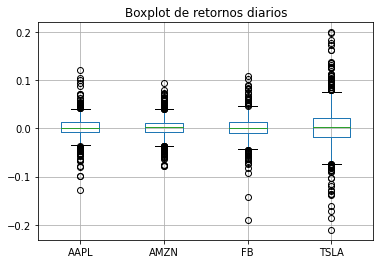

In [ ]:
## Retornos extremos
retorno_diario.boxplot()
plt.title('Boxplot de retornos diarios')
plt.show()

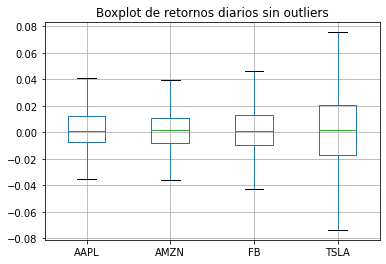

In [ ]:
## Sin Outliers
retorno_diario.boxplot(showfliers=False)
plt.title('Boxplot de retornos diarios sin outliers')
plt.show()

In [ ]:
## Correlación entre precio de Stocks
retorno_diario.corr()

,AAPL,AMZN,FB,TSLA
AAPL,1.000000,0.647591,0.607667,0.412407
AMZN,0.647591,1.000000,0.616823,0.378396
FB,0.607667,0.616823,1.000000,0.326290
TSLA,0.412407,0.378396,0.326290,1.000000


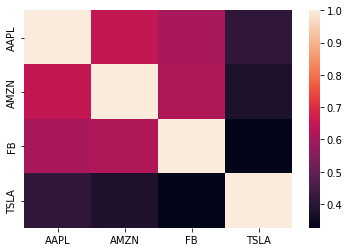

In [ ]:
## Mapa de correlación (Heat Map)
sns.heatmap(retorno_diario.corr())
plt.show()

# Backtest

Realizando un forecast en el pasado con prophet (solo para datos con datetime series)

In [ ]:
# Importar blibiotecas
from fbprophet import Prophet 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
end1 = dt.date(end.year -1, end.month, end.day) # 1 año atras
end2 = dt.date(end.year, end.month -6, end.day) # 6 meses atras
start1 = dt.date(end1.year -3, end.month, end.day)

In [ ]:
df1 = yf.download(tickers,start1,end1)['Adj Close']
df2 = yf.download(tickers,start1,end2)['Adj Close']

In [ ]:
modelfb1 = Prophet()
df1 = df1.reset_index()
df1[['ds', 'y']] = df1[['Date', 'TSLA']]
modelfb1.fit(df1)

In [ ]:
modelfb2 = Prophet()
df2 = df2.reset_index()
df2[['ds', 'y']] = df2[['Date', 'TSLA']]
modelfb2.fit(df2)

In [ ]:
futuro = modelfb1.make_future_dataframe(periods=365)

In [ ]:
futuro1 = modelfb1.make_future_dataframe(periods=180)

In [ ]:
prediccion1 = modelfb1.predict(futuro)
prediccion2 = modelfb2.predict(futuro1)

# RESULTADOS

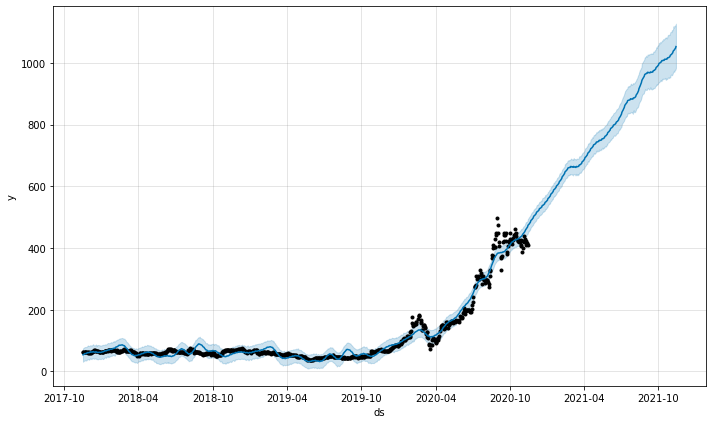

In [ ]:
# Prediccion con 1 año
modelfb1.plot(prediccion1)
plt.show()

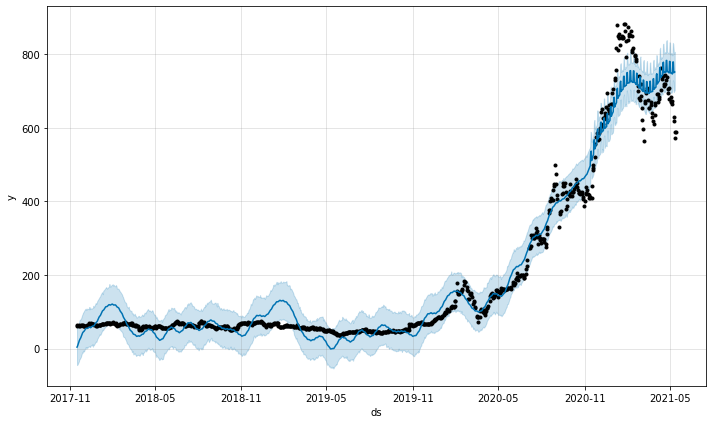

In [ ]:
# Prediccion con 6 meses
modelfb2.plot(prediccion2)
plt.show()

In [ ]:
# Prediccion 6 meses en el futuro
modelfb3 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'TSLA']]
modelfb3.fit(df)

In [ ]:
futuro3 = modelfb3.make_future_dataframe(periods=180)

In [ ]:
forecast3 = modelfb3.predict(futuro3)

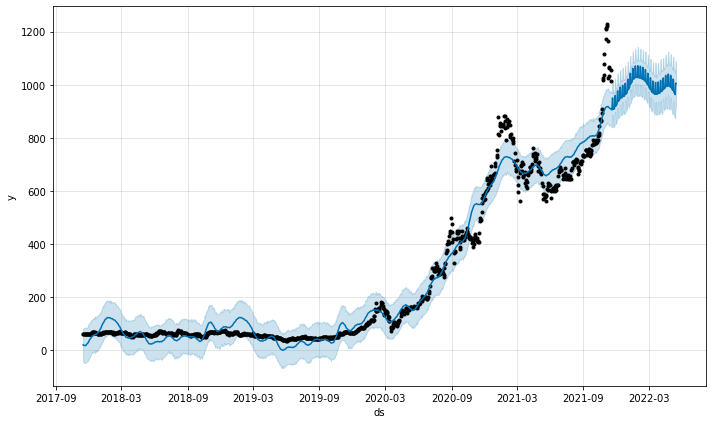

In [ ]:
modelfb3.plot(forecast3)
plt.show()

¿Se puede explicar el retorno del precio de las acciones entre si?

In [ ]:
import statsmodels.api as sm

In [ ]:
y = retorno_diario['TSLA']
x1 = retorno_diario[['AAPL']]
x2 = retorno_diario[['AAPL','FB']]
x3 = retorno_diario[['AAPL','FB','AMZN']]

x1 =sm.add_constant(x1)
x2 =sm.add_constant(x2)
x3 =sm.add_constant(x3)

In [ ]:
model1 = sm.OLS(y, x1)
model2 = sm.OLS(y, x2)
model3 = sm.OLS(y, x3)

resultados1 = model1.fit()
resultados2 = model2.fit()
resultados3 = model3.fit()

In [ ]:
resultados1.rsquared

In [ ]:
resultados2.rsquared

In [ ]:
resultados3.rsquared